In [1]:
import pyspark.sql
from pyspark.sql.functions import *
#from pyspark.sql.types import *

In [2]:
spark = pyspark.sql.SparkSession.builder.appName("Understanding Pyspark").config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","10g").getOrCreate()

In [162]:
df = spark.read.csv('e-commerce_data.csv',header=True,escape="\"")

In [4]:
df.show(5,0)

+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate   |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/2010 8:26|2.55     |17850     |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/2010 8:26|2.75     |17850     |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |12/1/2010 8:26|3.39     |17850     |United Kingdom|
+---------+---------+-----------------------------------

In [5]:
df.count()

541909

In [6]:
df.dtypes

[('InvoiceNo', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'string'),
 ('InvoiceDate', 'string'),
 ('UnitPrice', 'string'),
 ('CustomerID', 'string'),
 ('Country', 'string')]

In [7]:
df.select('CustomerID').distinct().count()

4373

In [8]:
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).orderBy(col('country_count').desc()).show()

+---------------+-------------+
|        Country|country_count|
+---------------+-------------+
| United Kingdom|         3950|
|        Germany|           95|
|         France|           87|
|          Spain|           31|
|        Belgium|           25|
|    Switzerland|           21|
|       Portugal|           19|
|          Italy|           15|
|        Finland|           12|
|        Austria|           11|
|         Norway|           10|
|Channel Islands|            9|
|      Australia|            9|
|    Netherlands|            9|
|        Denmark|            9|
|         Cyprus|            8|
|          Japan|            8|
|         Sweden|            8|
|         Poland|            6|
|         Greece|            4|
+---------------+-------------+
only showing top 20 rows



In [177]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df.withColumn('date',to_timestamp('InvoiceDate', 'mm/dd/yy HH:mm'))

In [178]:
df.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|               date|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|2010-01-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-01-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|2010-01-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-01-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-01-01 08:26:00|
|   536365|    2

In [192]:
df.filter(col('date').isNull()).count() # data conversion was successful

0

In [191]:
df.select(max('date')).show()
df.select(min('date')).show()

+-------------------+
|          max(date)|
+-------------------+
|2011-01-31 19:55:00|
+-------------------+

+-------------------+
|          min(date)|
+-------------------+
|2010-01-01 08:26:00|
+-------------------+




    Recency: How recently has each customer made a purchase?
    Frequency: How often have they bought something?
    Monetary Value: How much money do they spend on average when making purchases?


In [166]:
df_freq = df.groupBy('CustomerId').agg(count('*').alias('frequency'))
df_freq.show()

+----------+---------+
|CustomerId|frequency|
+----------+---------+
|     16250|       24|
|     15574|      168|
|     15555|      925|
|     15271|      275|
|     17714|       10|
|     17757|      742|
|     17551|       43|
|     13187|       37|
|     16549|      981|
|     12637|      394|
|     15052|       30|
|     14525|      298|
|     18283|      756|
|     13107|       60|
|     16303|      167|
|     13174|      314|
|     13027|       26|
|     12957|      244|
|     17128|       14|
|     14439|       32|
+----------+---------+
only showing top 20 rows



In [181]:
df_recency = df.groupBy('CustomerId').agg(max('date').alias('most_recent_purchase'))
df_recency.show()

+----------+--------------------+
|CustomerId|most_recent_purchase|
+----------+--------------------+
|     16250| 2011-01-23 15:07:00|
|     15574| 2011-01-15 12:01:00|
|     15555| 2011-01-28 12:16:00|
|     15271| 2011-01-30 08:17:00|
|     17714| 2011-01-23 10:32:00|
|     17757| 2011-01-30 16:28:00|
|     17551| 2010-01-15 14:12:00|
|     13187| 2011-01-06 18:57:00|
|     16549| 2011-01-29 15:06:00|
|     12637| 2011-01-27 09:40:00|
|     15052| 2011-01-24 15:52:00|
|     14525| 2011-01-31 18:49:00|
|     18283| 2011-01-30 12:59:00|
|     13107| 2011-01-26 14:52:00|
|     16303| 2011-01-31 13:41:00|
|     13174| 2011-01-27 15:36:00|
|     13027| 2011-01-20 09:48:00|
|     12957| 2011-01-30 09:53:00|
|     17128| 2011-01-09 12:02:00|
|     14439| 2011-01-24 11:39:00|
+----------+--------------------+
only showing top 20 rows



In [188]:
df_recency = df_recency.withColumn('from_date', lit('2010-01-01 08:26:00'))
df_recency = df_recency.withColumn('recency_score', unix_timestamp('most_recent_purchase')- unix_timestamp('from_date'))
df_recency.show()

+----------+--------------------+-------------------+-------------+
|CustomerId|most_recent_purchase|          from_date|recency_score|
+----------+--------------------+-------------------+-------------+
|     16250| 2011-01-23 15:07:00|2010-01-01 08:26:00|     33460860|
|     15574| 2011-01-15 12:01:00|2010-01-01 08:26:00|     32758500|
|     15555| 2011-01-28 12:16:00|2010-01-01 08:26:00|     33882600|
|     15271| 2011-01-30 08:17:00|2010-01-01 08:26:00|     34041060|
|     17714| 2011-01-23 10:32:00|2010-01-01 08:26:00|     33444360|
|     17757| 2011-01-30 16:28:00|2010-01-01 08:26:00|     34070520|
|     17551| 2010-01-15 14:12:00|2010-01-01 08:26:00|      1230360|
|     13187| 2011-01-06 18:57:00|2010-01-01 08:26:00|     32005860|
|     16549| 2011-01-29 15:06:00|2010-01-01 08:26:00|     33979200|
|     12637| 2011-01-27 09:40:00|2010-01-01 08:26:00|     33786840|
|     15052| 2011-01-24 15:52:00|2010-01-01 08:26:00|     33549960|
|     14525| 2011-01-31 18:49:00|2010-01-01 08:2

In [194]:
df = df.withColumn('total_spendings', col('Quantity') * col('UnitPrice'))
df_money = df.groupBy('CustomerId').agg(sum('total_spendings').alias('monetary_value'))
df_money.show()

+----------+------------------+
|CustomerId|    monetary_value|
+----------+------------------+
|     16250|            389.44|
|     15574| 702.2500000000002|
|     15555| 4758.200000000001|
|     15271|2485.8199999999997|
|     17714|             153.0|
|     17757| 5585.489999999999|
|     17551|            306.84|
|     13187|236.01999999999995|
|     16549| 4154.640000000001|
|     12637| 5953.250000000002|
|     15052|            215.78|
|     14525|           4221.37|
|     18283|2094.8799999999997|
|     13107|           1524.07|
|     16303| 5305.830000000002|
|     13174|2817.0300000000016|
|     13027|            6912.0|
|     12957|3979.0399999999995|
|     17128|            157.09|
|     14439|           2661.24|
+----------+------------------+
only showing top 20 rows



In [198]:
df_features = df_freq.join(df_recency, on='CustomerId',how='inner')\
.join(df_money, on='CustomerId', how='inner')\
.select(['CustomerId','frequency','recency_score','monetary_value'])
df_features.show(10)

+----------+---------+-------------+------------------+
|CustomerId|frequency|recency_score|    monetary_value|
+----------+---------+-------------+------------------+
|     16250|       24|     33460860|            389.44|
|     15574|      168|     32758500| 702.2500000000002|
|     15555|      925|     33882600| 4758.200000000001|
|     15271|      275|     34041060|2485.8199999999997|
|     17714|       10|     33444360|             153.0|
|     17757|      742|     34070520| 5585.489999999999|
|     17551|       43|      1230360|            306.84|
|     13187|       37|     32005860|236.01999999999995|
|     16549|      981|     33979200| 4154.640000000001|
|     12637|      394|     33786840| 5953.250000000002|
+----------+---------+-------------+------------------+
only showing top 10 rows



In [199]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

In [203]:
assemble=VectorAssembler(inputCols=['recency_score','frequency','monetary_value'], outputCol='features')
assembled_data=assemble.transform(df_features)
assembled_data.show(5)

+----------+---------+-------------+------------------+--------------------+
|CustomerId|frequency|recency_score|    monetary_value|            features|
+----------+---------+-------------+------------------+--------------------+
|     16250|       24|     33460860|            389.44|[3.346086E7,24.0,...|
|     15574|      168|     32758500| 702.2500000000002|[3.27585E7,168.0,...|
|     15555|      925|     33882600| 4758.200000000001|[3.38826E7,925.0,...|
|     15271|      275|     34041060|2485.8199999999997|[3.404106E7,275.0...|
|     17714|       10|     33444360|             153.0|[3.344436E7,10.0,...|
+----------+---------+-------------+------------------+--------------------+
only showing top 5 rows



In [206]:
scaler = StandardScaler(inputCol='features',outputCol='standardized').fit(assembled_data)
data_scaled = scaler.transform(assembled_data)
data_scaled.select('standardized').show(5)

+--------------------+
|        standardized|
+--------------------+
|[6.03878491885398...|
|[5.91202783683020...|
|[6.11489764135058...|
|[6.14349540776309...|
|[6.03580711280951...|
+--------------------+
only showing top 5 rows



In [207]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

In [208]:
cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,10):
    kmeans_model = KMeans(featuresCol='standardized', k=i)
    kmeans_model = kmeans_model.fit(data_scaled)
    output = kmeans_model.transform(data_scaled)
    cost[i] = kmeans_model.summary.trainingCost

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

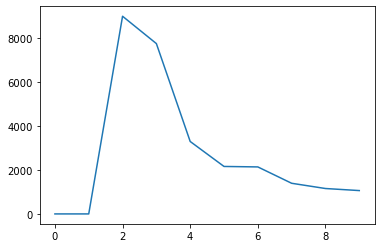

In [211]:
plt.plot(cost)

In [214]:
kmeans_model = KMeans(featuresCol='standardized', k=4)
kmeans_model = kmeans_model.fit(data_scaled)

In [215]:
preds = kmeans_model.transform(data_scaled)

preds.show(10)

+----------+---------+-------------+------------------+--------------------+--------------------+----------+
|CustomerId|frequency|recency_score|    monetary_value|            features|        standardized|prediction|
+----------+---------+-------------+------------------+--------------------+--------------------+----------+
|     16250|       24|     33460860|            389.44|[3.346086E7,24.0,...|[6.03878491885398...|         0|
|     15574|      168|     32758500| 702.2500000000002|[3.27585E7,168.0,...|[5.91202783683020...|         0|
|     15555|      925|     33882600| 4758.200000000001|[3.38826E7,925.0,...|[6.11489764135058...|         0|
|     15271|      275|     34041060|2485.8199999999997|[3.404106E7,275.0...|[6.14349540776309...|         0|
|     17714|       10|     33444360|             153.0|[3.344436E7,10.0,...|[6.03580711280951...|         0|
|     17757|      742|     34070520| 5585.489999999999|[3.407052E7,742.0...|[6.14881214510066...|         0|
|     17551|       

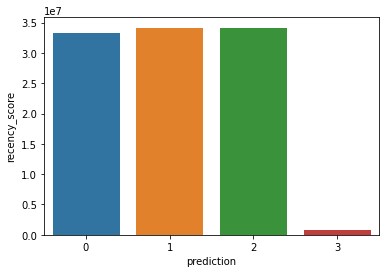

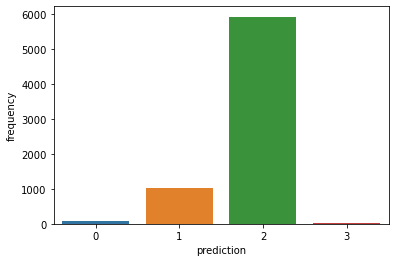

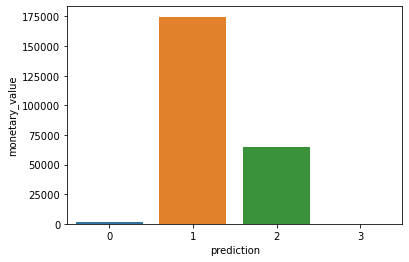

In [219]:
df_res = preds.select('recency_score','frequency','monetary_value','prediction')
df_res = df_res.toPandas()
avg_df = df_res.groupby(['prediction'], as_index=False).mean()

list1 = ['recency_score','frequency','monetary_value']

for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()